# Bank Customer Artificial Neural Network

This is an artificial neural network that uses Python to predict whether a customer will leave a bank based on multiple independent variables (some of which are credit score, age and gender). The neural network is trained on a set of data and is applied to other data to test its accuracy.

##### Importing the libraries


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### Importing the dataset

In [25]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [61]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

### Part 1 - Data Preprocessing

##### Encoding categorical data

In [64]:
pd.set_option('display.max_columns', 26)
pd.set_option('display.max_rows', 26)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])


labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

transformer = ColumnTransformer([
        ("OneHot",        # Just a name
         OneHotEncoder(), # The transformer class
         [1]              # The column(s) to be applied on.
         )
    ],
    remainder='passthrough' # donot apply anything to the remaining columns
)

# X = transformer.fit_transform(X.tolist()) # transform takes only a list
# # X = X[:, 1:]

X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

###### Splitting the dataset into the Training set and Test set

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

###### Feature Scaling

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) # Scaling separately
X_test = sc.transform(X_test)
#print(X_test.shape)
#print(X_train.shape)


### Part 2 - Make the ANN - Method 1



###### Importing the Keras libraries and packages

In [49]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

##### Building ANN model

In [65]:

# Initialising the ANN


classifier = Sequential()

# Adding the input layer and the first hidden layer (with dropout)
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10)) # 6 nodes in hidden layer, initialize weights uniformly, use rectifier funtion for hidden layer, except 11 input nodes
classifier.add(Dropout(0.1)) # Disable 10% of the neurons on each iteration

# Adding the second hidden layer (with dropout)
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu')) # input_dim already specified in previous hidden layer, kernel initialzation is for the weight
classifier.add(Dropout(0.1))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid')) # only 1 node in output layer, use sigmoid function for probability



###### Training ANN model

In [66]:
# Compiling the ANN - apply stochastic gradient descent
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) # loss defined this way since output is binary, only 1 output node

# Fitting the ANN to the Training set
history=classifier.fit(X_train, y_train, batch_size = 10, epochs = 30)  #epochs = 10

Epoch 1/30
800/800 [==============================] - 2s 1ms/step - loss: 0.4874 - accuracy: 0.7969
Epoch 2/30
800/800 [==============================] - 1s 1ms/step - loss: 0.4352 - accuracy: 0.7975
Epoch 3/30
800/800 [==============================] - 1s 1ms/step - loss: 0.4324 - accuracy: 0.7975
Epoch 4/30
800/800 [==============================] - 1s 1ms/step - loss: 0.4285 - accuracy: 0.7975
Epoch 5/30
800/800 [==============================] - 1s 1ms/step - loss: 0.4288 - accuracy: 0.8180
Epoch 6/30
800/800 [==============================] - 1s 1ms/step - loss: 0.4274 - accuracy: 0.8257
Epoch 7/30
800/800 [==============================] - 1s 1ms/step - loss: 0.4267 - accuracy: 0.8288
Epoch 8/30
800/800 [==============================] - 1s 1ms/step - loss: 0.4219 - accuracy: 0.8291
Epoch 9/30
800/800 [==============================] - 1s 1ms/step - loss: 0.4250 - accuracy: 0.8307
Epoch 10/30
800/800 [==============================] - 1s 1ms/step - loss: 0.4248 - accuracy: 0.8296

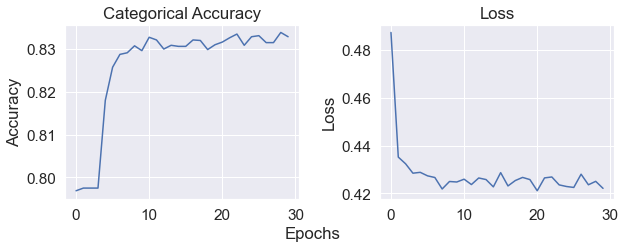

In [67]:
fig_w, fig_h = (4.5, 3.5)
plt.rcParams.update({'figure.figsize': (fig_w, fig_h)})
fig, axs = plt.subplots(1, 2, figsize=(2*fig_w,fig_h))

plt.sca(axs[0])
plt.plot(history.history['accuracy'])

plt.ylabel('Accuracy')
plt.title('Categorical Accuracy')

plt.sca(axs[1])
plt.plot(history.history['loss'])
plt.ylabel('Loss')
plt.title('Loss')

plt.tight_layout()
fig.text(0.5, 0.01,'Epochs', ha='center')
plt.show()

### Part 3 - Making the predictions and evaluating the model


In [74]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5) # Set threshold for returning true or false

# EXAMPLE: Predicting a single new observation
'''Predict if the customer with the following informations will leave the bank: 
Geography: France
Credit Score: 600
Gender: Male
Age: 40 years old
Tenure: 3 years
Balance: $60000
Number of Products: 2
Does this customer have a credit card ? Yes
Is this customer an Active Member: Yes
Estimated Salary: $50000
'''
new_prediction = classifier.predict(sc.transform(np.array([[772, 2, 1, 42, 3,75075.31, 2,1,0,92888.52]]))) # Manually encode all independent variables, scale to training set

new_prediction = (new_prediction > 0.5)

print(new_prediction)



1/1 [==============================] - 0s 26ms/step
[[False]]


In [75]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1550   33]
 [ 295  122]]


In [76]:
import seaborn as sns

In [18]:

# labels=list(pd.get_dummies(dataset['Exited']).columns)

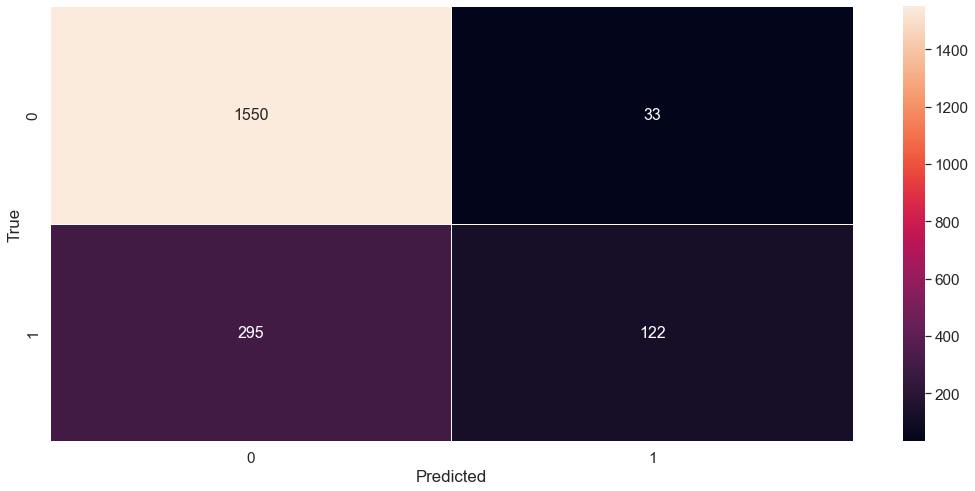

In [77]:
plt.figure(figsize=(18,8))
sns.set(font_scale=1.4) 
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='d',linewidths=0.5, xticklabels=labels, yticklabels=labels) 
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Part 4 - Evaluating, Improving and Tuning the ANN - Method 2

In [20]:


# IMPORTANT NOTE: ONLY RUN THIS SECTION IF PART 2 AND 3 ARE NOT RUN
# This is an improved way to build the ANN, but I left the first part in for referral purposes
# Only run 'Evaluating the ANN' OR 'Tuning the ANN', not both
# Also note that Tuning the ANN may take several hours, depending on processing power

# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 3) 
accuracies = cross_val_score(estimator = classifier, X = X_train, y= y_train, cv = 10, n_jobs = -1) # input training data, n_jobs = -1 uses ALL CPUS for faster computation
mean = accuracies.mean()
variance = accuracies.std()
print(accuracies)

[0.82625002 0.8075     0.78125    0.85124999 0.82749999 0.76499999
 0.8125     0.82249999 0.78874999 0.81375003]


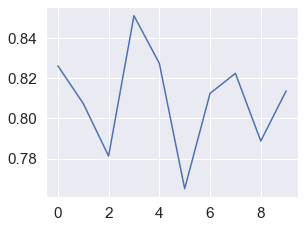

In [21]:
plt.plot(accuracies)
plt.show()

### Improving the ANN

In [23]:

# # Dropout regularization to reduce overfitting if needed (in part 2 above)

# # Tuning the ANN
# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import GridSearchCV
# from keras.models import Sequential
# from keras.layers import Dense
# def build_classifier(optimizer):
#     classifier = Sequential()
#     classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
#     classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
#     classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
#     classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
#     return classifier
# classifier = KerasClassifier(build_fn = build_classifier)
# parameters = {'batch_size': [25, 32], 'epochs': [100, 500], 'optimizer': ['adam', 'rmsprop']} # create dictionary for parameters to optimize
# grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv = 10)
# grid_search = grid_search.fit(X_train, y_train)
# best_parameters = grid_search.best_params_
# best_accuracy = grid_search.best_score_

Epoch 1/100
288/288 [==============================] - 2s 1ms/step - loss: 0.5681 - accuracy: 0.7950
Epoch 2/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4349 - accuracy: 0.7962
Epoch 3/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4297 - accuracy: 0.7962
Epoch 4/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4261 - accuracy: 0.7962
Epoch 5/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4235 - accuracy: 0.7962
Epoch 6/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4208 - accuracy: 0.7962
Epoch 7/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4188 - accuracy: 0.8122
Epoch 8/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4172 - accuracy: 0.8225
Epoch 9/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4159 - accuracy: 0.8267
Epoch 10/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4148 - accura

288/288 [==============================] - 0s 1ms/step - loss: 0.4001 - accuracy: 0.8354
Epoch 82/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4001 - accuracy: 0.8356
Epoch 83/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4002 - accuracy: 0.8375
Epoch 84/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4000 - accuracy: 0.8358
Epoch 85/100
288/288 [==============================] - 0s 2ms/step - loss: 0.4003 - accuracy: 0.8365
Epoch 86/100
288/288 [==============================] - 0s 2ms/step - loss: 0.4000 - accuracy: 0.8353
Epoch 87/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4002 - accuracy: 0.8353
Epoch 88/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4000 - accuracy: 0.8354
Epoch 89/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4001 - accuracy: 0.8351
Epoch 90/100
288/288 [==============================] - 0s 1ms/step - loss: 0.3997 - accuracy: 

288/288 [==============================] - 0s 1ms/step - loss: 0.3938 - accuracy: 0.8378
Epoch 62/100
288/288 [==============================] - 0s 1ms/step - loss: 0.3942 - accuracy: 0.8381
Epoch 63/100
288/288 [==============================] - 0s 1ms/step - loss: 0.3937 - accuracy: 0.8381
Epoch 64/100
288/288 [==============================] - 0s 1ms/step - loss: 0.3938 - accuracy: 0.8374
Epoch 65/100
288/288 [==============================] - 0s 1ms/step - loss: 0.3942 - accuracy: 0.8393
Epoch 66/100
288/288 [==============================] - 0s 1ms/step - loss: 0.3939 - accuracy: 0.8376
Epoch 67/100
288/288 [==============================] - 0s 1ms/step - loss: 0.3941 - accuracy: 0.8388
Epoch 68/100
288/288 [==============================] - 0s 1ms/step - loss: 0.3937 - accuracy: 0.8388
Epoch 69/100
288/288 [==============================] - 0s 1ms/step - loss: 0.3939 - accuracy: 0.8375
Epoch 70/100
288/288 [==============================] - 0s 1ms/step - loss: 0.3941 - accuracy: 

288/288 [==============================] - 0s 1ms/step - loss: 0.3948 - accuracy: 0.8401
Epoch 42/100
288/288 [==============================] - 0s 1ms/step - loss: 0.3946 - accuracy: 0.8406
Epoch 43/100
288/288 [==============================] - 0s 1ms/step - loss: 0.3945 - accuracy: 0.8396
Epoch 44/100
288/288 [==============================] - 0s 1ms/step - loss: 0.3941 - accuracy: 0.8399
Epoch 45/100
288/288 [==============================] - 0s 1ms/step - loss: 0.3943 - accuracy: 0.8399
Epoch 46/100
288/288 [==============================] - 0s 1ms/step - loss: 0.3941 - accuracy: 0.8400
Epoch 47/100
288/288 [==============================] - 0s 2ms/step - loss: 0.3940 - accuracy: 0.8406
Epoch 48/100
288/288 [==============================] - 0s 1ms/step - loss: 0.3941 - accuracy: 0.8389
Epoch 49/100
288/288 [==============================] - 0s 1ms/step - loss: 0.3935 - accuracy: 0.8388
Epoch 50/100
288/288 [==============================] - 1s 2ms/step - loss: 0.3933 - accuracy: 

288/288 [==============================] - 0s 1ms/step - loss: 0.4107 - accuracy: 0.8317
Epoch 22/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4102 - accuracy: 0.8313
Epoch 23/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4098 - accuracy: 0.8308
Epoch 24/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4094 - accuracy: 0.8315
Epoch 25/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4086 - accuracy: 0.8310
Epoch 26/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4084 - accuracy: 0.8325
Epoch 27/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4081 - accuracy: 0.8314
Epoch 28/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4077 - accuracy: 0.8325
Epoch 29/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4077 - accuracy: 0.8329
Epoch 30/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4072 - accuracy: 

KeyboardInterrupt: 

In [44]:
from sklearn.feature_extraction import FeatureHasher
>>> from sklearn.preprocessing import MinMaxScaler
>>> import pandas as pd   
>>> Xz = pd.DataFrame({
...     "documents": ["First item", "second one here", "Is this the last?"],
...     "width": [3, 4, 5],
... }) 
print(Xz)

>>> # "documents" is a string which configures ColumnTransformer to
>>> # pass the documents column as a 1d array to the FeatureHasher
>>> ct = ColumnTransformer( transformers = 
...     [("text_preprocess", FeatureHasher(input_type="string"), "documents"),
...      ("num_preprocess", MinMaxScaler(), ["width"])])
>>> X_trans = ct.fit_transform(Xz) 

           documents  width
0         First item      3
1    second one here      4
2  Is this the last?      5


In [45]:
print(X_trans)

  (0, 226289)	1.0
  (0, 276572)	1.0
  (0, 301976)	1.0
  (0, 323322)	-1.0
  (0, 341263)	-1.0
  (0, 364501)	-2.0
  (0, 532659)	-2.0
  (0, 803687)	1.0
  (1, 226289)	1.0
  (1, 296051)	2.0
  (1, 301976)	2.0
  (1, 341263)	-1.0
  (1, 595059)	1.0
  (1, 803687)	4.0
  (1, 862625)	-1.0
  (1, 871725)	-1.0
  (1, 927572)	-2.0
  (1, 1048576)	0.5
  (2, 122826)	1.0
  (2, 301976)	3.0
  (2, 341263)	-3.0
  (2, 354738)	1.0
  (2, 364501)	-1.0
  (2, 532659)	-3.0
  (2, 803687)	1.0
  (2, 871725)	-2.0
  (2, 879148)	1.0
  (2, 960506)	-1.0
  (2, 1048576)	1.0
